In [ ]:
#dask_kaggle
# https://www.kaggle.com/puneetgrover/speed-up-your-algorithms-dask

In [37]:
import numpy as np
import pandas as pd
import dask.array as da
import graphviz
import matplotlib.pyplot as plt


In [ ]:
a) Array: 

In [2]:
arr = np.random.randint(1, 1000, (1000, 1000))


In [4]:
arr.shape

(1000, 1000)

In [5]:
# from_array chunks
darr = da.from_array(arr, chunks=(250, 250))
darr

dask.array<array, shape=(1000, 1000), dtype=int32, chunksize=(250, 250)>

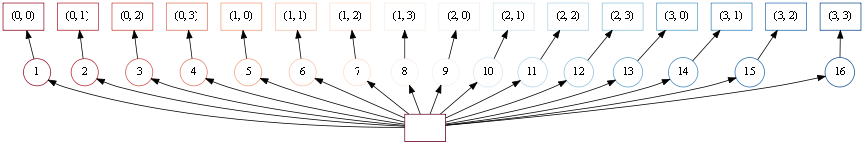

In [6]:
darr.visualize(color="order", size="9,10!")


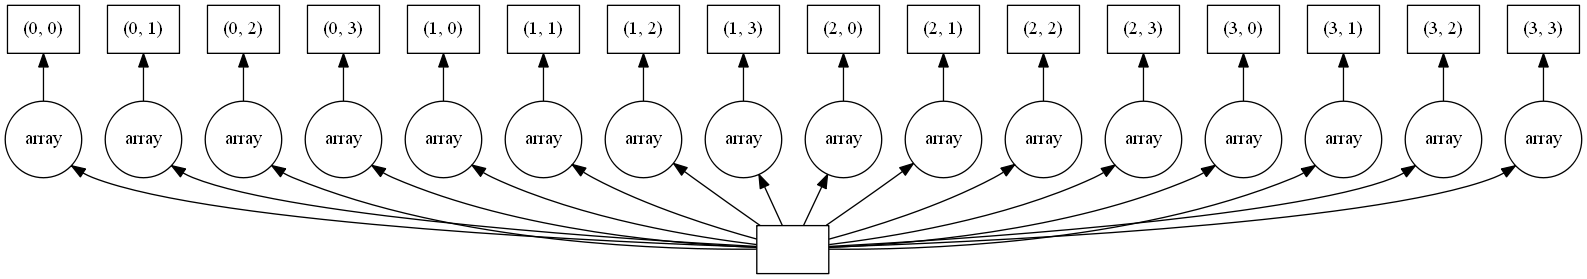

In [7]:
darr.visualize()

In [9]:
darr.chunks, darr.chunksize, darr.npartitions

(((250, 250, 250, 250), (250, 250, 250, 250)), (250, 250), 16)

In [10]:
darr.chunks

((250, 250, 250, 250), (250, 250, 250, 250))

In [11]:
darr.chunksize

(250, 250)

In [12]:
darr.npartitions

16

In [13]:
res = darr.sum(axis=0)

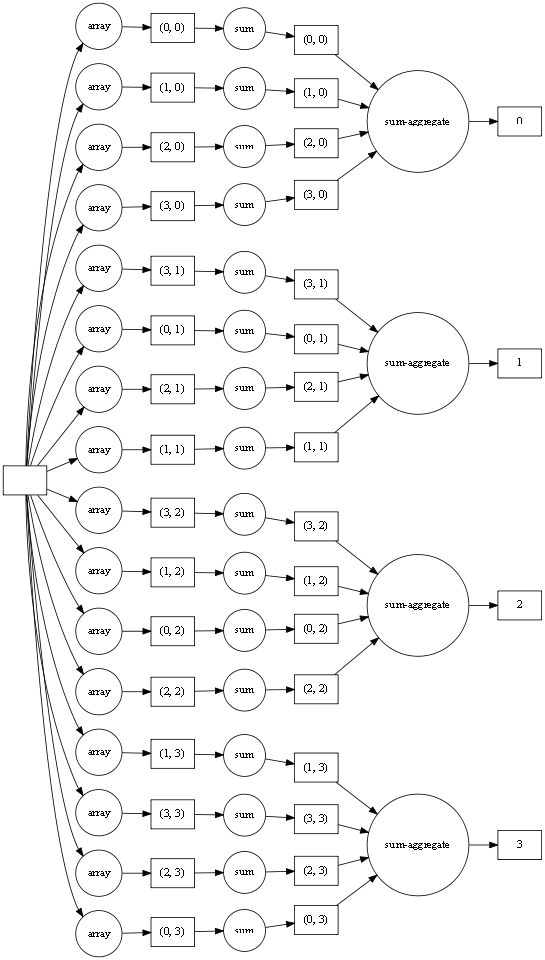

In [27]:
# visualize(rankdir="LR"
# LR : from left to righ
res.visualize(rankdir="LR", size="10,10") # Graph of methods we applied
# If we have a graph structure with many independent nodes per level in our implementation, Dask will be able to 
# parallelize it and we will get speedup, if our problem is sufficiently large.


In [28]:
res.compute().shape

(1000,)

In [30]:
res.compute()

array([492677, 508608, 487283, 506442, 511376, 505156, 497785, 483340,
       498041, 492960, 501405, 490925, 505976, 495599, 500414, 512164,
       487936, 514439, 506778, 508606, 488564, 488321, 506649, 493706,
       512863, 520114, 511141, 495536, 505764, 498368, 498594, 515595,
       501845, 506155, 496377, 497378, 500840, 486399, 508238, 499324,
       512942, 506110, 502708, 486428, 488989, 493154, 511859, 492670,
       512033, 492009, 507589, 506773, 518130, 513842, 521345, 508043,
       495634, 487031, 498856, 502418, 504824, 511601, 490960, 495777,
       502373, 502889, 515806, 504294, 506284, 502731, 501843, 495661,
       510496, 502862, 493687, 500139, 498609, 492236, 485372, 488952,
       498485, 492468, 492869, 497765, 499067, 511678, 497031, 506811,
       510637, 496181, 494621, 494587, 498956, 501373, 508446, 493612,
       508449, 494569, 498408, 492041, 518078, 501399, 511620, 507763,
       507722, 501247, 511210, 499083, 493125, 502020, 484827, 501067,
      

In [31]:
def numpy_mean(size=(10, 10)):
  arr = np.random.random(size=size)
  return arr.mean()

def dask_mean(size=(10, 10)):
  if size[0] > 10000: chunks = (1000, 1000)
  else: chunks = (int(size[0]/10), int(size[1]/10))
  
  arr = da.random.random(size=size, chunks=chunks)
  y = arr.mean()
  return y.compute()

In [32]:
import time

def dask_arr_chk():
  sizes = []
  times = []
  size = 10
  for i in range(5):
    dim1 = size ** (i+1)
    for j in range(4):
      dim2 = size ** (j+1)
      if dim1*dim2 in sizes: continue
      st = time.time()
      dask_mean(size=(dim1, dim2))
      en = time.time()
      sizes.append(dim1*dim2)
      times.append(en-st)
  return sizes, times

In [33]:
def numpy_arr_chk():
  sizes = []
  times = []
  size = 10
  for i in range(4):
    dim1 = size ** (i+1)
    for j in range(4):
      dim2 = size ** (j+1)
      if dim1*dim2 in sizes: continue
      st = time.time()
      numpy_mean(size=(dim1, dim2))
      en = time.time()
      sizes.append(dim1*dim2)
      times.append(en-st)
  return sizes, times

In [34]:
%%time
x1, y1 = numpy_arr_chk()

Wall time: 1.41 s


In [35]:
%%time
x2, y2 = dask_arr_chk()

Wall time: 7.32 s


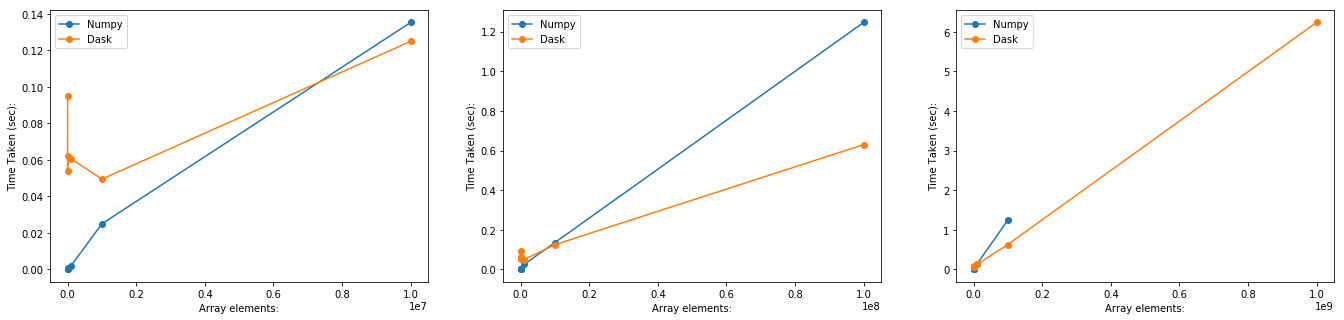

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(23, 5))
axs[0].plot(x1[:-1], y1[:-1], "o-", label="Numpy")
axs[0].plot(x2[:-2], y2[:-2], "o-", label="Dask")
axs[0].set_xlabel("Array elements:")
axs[0].set_ylabel("Time Taken (sec):")
axs[0].legend()

axs[1].plot(x1, y1, "o-", label="Numpy")
axs[1].plot(x2[:-1], y2[:-1], "o-", label="Dask")
axs[1].set_xlabel("Array elements:")
axs[1].set_ylabel("Time Taken (sec):")
axs[1].legend()

axs[2].plot(x1, y1, "o-", label="Numpy")
axs[2].plot(x2, y2, "o-", label="Dask")
axs[2].set_xlabel("Array elements:")
axs[2].set_ylabel("Time Taken (sec):")
axs[2].legend()